In [6]:
from utils.initialisation import DenseLayer
from utils.feed import feed_forward, back_prop
from utils.loss import  get_loss
from utils.activation import get_activation
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [7]:
x_tot = np.random.rand(1000,2)
y_tot = np.random.rand(1000,1)
y_tot[:,0] = np.sin(x_tot[:,0]) + np.cos(x_tot[:,1])
y_tot = (y_tot > 0.4) * 1
x_train = x_tot[:800,:]
y_train = y_tot[:800,:]

x_test = x_tot[800:,:]
y_test = y_tot[800:,:]
 

In [8]:
x = x_train
y = y_train

w1,b1 = DenseLayer(2,5)
w2,b2 = DenseLayer(5)

for _ in tqdm(range(1000)):
    z1,a1=feed_forward(x,w1,b1,'relu')
    z2,a2=feed_forward(a1,w2,b2,'sigmoid')
    da_next = (a2-y)
    dw2, db2, da_next = back_prop(a1,w2, z2,da_next,'sigmoid')
    dw1, db1, da1 = back_prop(x,w1, z1,da_next,'relu')
    w1 -= 0.00001*dw1
    w2 -= 0.00001*dw2
    b1 -= 0.00001*db1
    b2 -= 0.00001*db2

100%|██████████| 1000/1000 [00:00<00:00, 1688.01it/s]


In [9]:
z1,a1=feed_forward(x_test,w1,b1,'relu')
z2,yp=feed_forward(a1,w2,b2,'sigmoid')


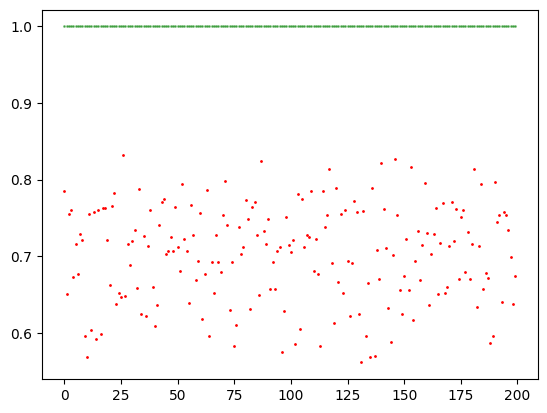

In [10]:
plt.scatter(range(x_test.shape[0]), y_test, c = 'green', alpha=0.5,s=1)
plt.scatter(range(x_test.shape[0]), yp, c = 'red',s=1)
plt.show()